In [ ]:


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
clf = AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier(), learning_rate=1)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)


1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = AdaBoostClassifier(n_estimators=50, estimator=SVC(kernel='linear'), learning_rate=1, algorithm='SAMME')
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(score)


0.9666666666666667


In [ ]:


from sklearn.naive_bayes import GaussianNB

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = AdaBoostClassifier(n_estimators=50, estimator=GaussianNB(), learning_rate=1)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(score)


1.0


In [ ]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
model = AdaBoostClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.806 (0.041)


In [ ]:
#make predictions using adaboost for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

# Define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
model = AdaBoostClassifier()
model.fit(X, y)
row = X[1].reshape(1,-1)
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [ ]:

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = AdaBoostClassifier(n_estimators=50, estimator=LogisticRegression(), learning_rate=1)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(score)


0.9666666666666667


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
model = AdaBoostRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print("Mean Absolute Error: %.3f (%.3f)" % (mean(scores), std(scores)))


Mean Absolute Error: -73.037 (5.181)


>1 0.794(0.039)
>2 0.862(0.030)
>3 0.866(0.036)
>4 0.899(0.028)
>5 0.916(0.028)
>6 0.925(0.026)
>7 0.935(0.020)
>8 0.928(0.023)
>9 0.931(0.029)
>10 0.932(0.021)


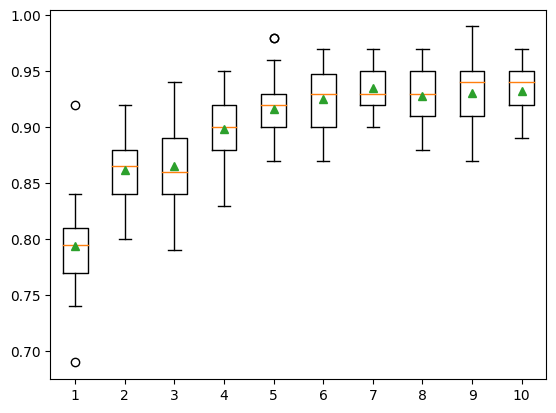

In [ ]:
def get_datset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
  return X,y
def get_models():
  models=dict()
  for i in range(1,11):
    base=DecisionTreeClassifier(max_depth=i)
    models[str(i)]=AdaBoostClassifier(base_estimator=base)
  return models
def evaluate_model(model,X,y):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

X,y = get_datset()
models=get_models()
results, names = list(),list()
for name,model in models.items():
  scores= evaluate_model(model,X,y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f(%.3f)'%(name,mean(scores),std(scores)))
import matplotlib.pyplot as plt
plt.boxplot(results,labels=names,showmeans=True)
plt.show()

(1000, 20) (1000,)
>0.100 0.767 0.049
>0.200 0.786 0.042
>0.300 0.802 0.040
>0.400 0.798 0.037
>0.500 0.805 0.042
>0.600 0.795 0.031
>0.700 0.799 0.035
>0.800 0.801 0.033
>0.900 0.805 0.032
>1.000 0.806 0.041
>1.100 0.801 0.037
>1.200 0.800 0.030
>1.300 0.799 0.041
>1.400 0.793 0.041
>1.500 0.790 0.040
>1.600 0.775 0.034
>1.700 0.767 0.054
>1.800 0.768 0.040
>1.900 0.736 0.047
>2.000 0.682 0.048


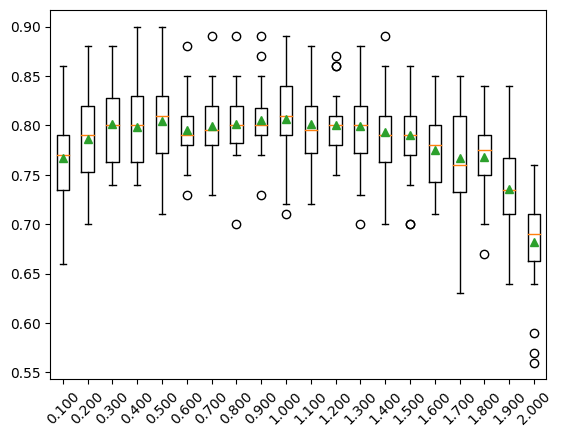

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

print(X.shape, y.shape)

from numpy import arange

import matplotlib.pyplot as plt

def get_dataset():
  X, y = make_classification(n_samples = 1000, n_features = 20, n_informative =15, n_redundant = 5, random_state = 6)
  return X,y

def get_models():
  models = dict()
  for i in arange(0.1,2.1,0.1):
    key = "%.3f"%i
    models[key] = AdaBoostClassifier(learning_rate = i)
  return models

def evaluate_model(model,X,y):
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
  scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv, n_jobs =-1, error_score = 'raise')
  return scores

X,y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():

  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print(">%s %.3f %.3f" % (name, mean(scores), std(scores)))

plt.boxplot(results, labels = names, showmeans = True)
plt.xticks(rotation = 45)
plt.show()